## 1. Business per neighborhood

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [86]:
# read data and save as a dataframe
separator = ','
column_names = [
    'opendata_id', 'city', 'postcode', 'latitude', 'longitude',
    'ihk_branch_id', 'nace_id', 'branch_top_level_id', 'employees_range',
    'ihk_branch_desc', 'nace_desc', 'branch_top_level_desc', 'business_age',
    'business_type', 'Bezirk', 'planungsraum_id', 'Planungsraum',
    'Bezirksregion', 'Prognoseraum', 'Ortsteil'
]
df = pd.read_csv('data/IHKBerlin_Gewerbedaten.txt', sep=separator)

df.head(10)

,opendata_id,city,postcode,latitude,longitude,ihk_branch_id,nace_id,branch_top_level_id,employees_range,ihk_branch_desc,nace_desc,branch_top_level_desc,business_age,business_type,Bezirk,planungsraum_id,Planungsraum,Bezirksregion,Prognoseraum,Ortsteil
0,572114,Berlin,10179,52.513315,13.411584,65122.0,6512.0,65.0,0 Beschäftigte,Schaden- u. Unfallversicherungen,Nichtlebensversicherungen,"Versicherungen, Rückversicherungen u. Pensions...",39.0,Kleingewerbetreibender,Mitte,1100312.0,Heine-Viertel West,Alexanderplatz,Zentrum,Mitte
1,6063606,Berlin,10713,52.488737,13.302834,562900.0,5629.0,56.0,0 Beschäftigte,Kantinen,Erbringung sonstiger Verpflegungsdienstleistungen,Gastronomie,39.0,Kleingewerbetreibender,Charlottenburg-Wilmersdorf,4500939.0,Eisenzahnstraße,Halensee,Wilmersdorf Zentrum,Wilmersdorf
2,131831318,Berlin,10713,52.479296,13.319051,47430.0,4743.0,47.0,0 Beschäftigte,EH m. Geräten der Unterhaltungselektronik,EH m. Geräten der Unterhaltungselektronik,Einzelhandel (ohne Handel mit Kraftfahrzeugen),39.0,Kleingewerbetreibender,Charlottenburg-Wilmersdorf,4501148.0,Brabanter Platz,Volkspark Wilmersdorf,Wilmersdorf Zentrum,Wilmersdorf
3,943032071440,Berlin,12047,52.486200,13.429312,731108.0,7311.0,73.0,0 Beschäftigte,"Promotion, Propagandisten",Werbeagenturen,Werbung u. Marktforschung,11.0,im Handelsregister eingetragen,Neukölln,8100314.0,Donaustraße,Reuterstraße,Neukölln,Neukölln
4,927439271464,Berlin,12435,52.492207,13.451324,451103.0,4511.0,45.0,1 - 3 Beschäftigte,"EH m. Elektro-, Gas- u. Hybridfahrzeugen",Handel m. Kraftwagen mit einem Gesamtgewicht v...,Handel mit Kraftfahrzeugen; Instandhaltung u. ...,9.0,Kleingewerbetreibender,Treptow-Köpenick,9100101.0,Alt-Treptow,Alt-Treptow,Treptow-Köpenick 1,Alt-Treptow
5,927441671472,Berlin,10117,52.513509,13.385791,6831.0,6831.0,68.0,4 - 6 Beschäftigte,"Vermittlung v. Grundstücken, Gebäuden u. Wohnu...","Vermittlung v. Grundstücken, Gebäuden u. Wohnu...",Grundstücks- u. Wohnungswesen,9.0,Kleingewerbetreibender,Mitte,1100206.0,Unter den Linden,Regierungsviertel,Zentrum,Mitte
6,942996071320,Berlin,10245,52.513798,13.454217,62020.0,6202.0,62.0,0 Beschäftigte,Erbringung v. Beratungsleistungen auf dem Gebi...,Erbringung v. Beratungsleistungen auf dem Gebi...,Erbringung v. Dienstleistungen der Information...,9.0,im Handelsregister eingetragen,Friedrichshain-Kreuzberg,2500833.0,Boxhagener Platz,Frankfurter Allee Süd FK,Friedrichshain Ost,Friedrichshain
7,943012271374,Berlin,10437,52.547734,13.402357,81100.0,8110.0,81.0,0 Beschäftigte,Hausmeisterdienste,Hausmeisterdienste,Gebäudebetreuung; Garten- u. Landschaftsbau,9.0,im Handelsregister eingetragen,Pankow,3601142.0,Falkplatz,Prenzlauer Berg Nordwest,Nördlicher Prenzlauer Berg,Prenzlauer Berg
8,33244216,Berlin,13507,52.583927,13.286736,47770.0,4777.0,47.0,4 - 6 Beschäftigte,EH m. Uhren u. Schmuck,EH m. Uhren u. Schmuck,Einzelhandel (ohne Handel mit Kraftfahrzeugen),39.0,Kleingewerbetreibender,Reinickendorf,12200515.0,Alt-Tegel,West 5 - Tegel,Tegel,Tegel
9,389856061424,Berlin,12489,52.428540,13.521512,620200.0,6202.0,62.0,0 Beschäftigte,Softwarehaus,Erbringung v. Beratungsleistungen auf dem Gebi...,Erbringung v. Dienstleistungen der Information...,22.0,Kleingewerbetreibender,Treptow-Köpenick,9200715.0,Wista,Adlershof,Treptow-Köpenick 2,Adlershof


## Exploration

In [87]:
# check city
list_city = df['city'].unique()
list_city

array(['Berlin'], dtype=object)

In [88]:
# list unique values for list_uhk_branch_desclist_uhk_branch_desc
list_uhk_branch_desc = df['ihk_branch_desc'].unique()
# len(list_uhk_branch_desc)
list_uhk_branch_desc

array(['Schaden- u. Unfallversicherungen', 'Kantinen',
       'EH m. Geräten der Unterhaltungselektronik', ..., 'HV v. Rohtabak',
       'H. v. Blumenerde und Gartenerde',
       'Lotsinnen u. Lotsen in der Schifffahrt'], dtype=object)

In [89]:
# list NACE CODE of our interest
lst_stores = ['56','90','91','92','93']

### Check categories in this codes

In [90]:
df[df['branch_top_level_id'] == 56]['ihk_branch_desc'].unique()

array(['Kantinen', 'Ausschank v. Getränken',
       'Restaurants mit herkömmlicher Bedienung', 'Gastronomie',
       'Imbissstuben u.ä.', 'Event-Caterer', 'Schankwirtschaften',
       'Eissalons', 'Bars', 'Cafés', 'Diskotheken u. Tanzlokale',
       'Restaurants mit Selbstbedienung', 'Partyservice',
       'Restaurants, Gaststätten, Imbissstuben, Cafés, Eissalons u. ä.',
       'Erbringung sonstiger Verpflegungsdienstleistungen',
       'Essen auf Rädern', 'Bringdienste mit fertigen Speisen',
       'EH m. Nahrungsmitteln u. Getränken im Reisebus usw.',
       'Eventcooking / Mietkoch', 'Schulkantinen, Pausenverkauf',
       'Raucherlokal, Shisha Bar',
       'Sonstige getränkegeprägte Gastronomie', 'Speisewagenbetriebe',
       'Gaststätten als Zeltbetriebe', 'Vergnügungslokale',
       'Systemgastronomie', 'Stehcafes / Coffee-Shop'], dtype=object)

In [91]:
df[df['branch_top_level_id'] == 90]['ihk_branch_desc'].unique()

array(['Dienstleistung im Bereich Veranstaltungstechnik',
       'Erbringung v. Dienstleistungen f. die darstellende Kunst',
       'Theater- u. Konzertveranstalter',
       'Selbstständige Restauratorinnen u. Restauratoren',
       'Varietés u. Kleinkunstbühnen',
       'Opern- u. Schauspielhäuser, Konzerthallen u. ähnliche Einrichtungen',
       'Betrieb v. Kultur- u. Unterhaltungseinrichtungen',
       'Diskjockey / Moderation / mobile Disko / Alleinunterhalter / Animateur',
       'Tontechniker',
       'Kreative, künstlerische u. unterhaltende Tätigkeiten',
       'Darstellende Kunst',
       'Selbstständige Journalistinnen u. Journalisten, Pressefotografinnen u. Pressefotografen',
       'Visagist, Maskenbildner, Make-up-Artist',
       'Selbstständige Schriftstellerinnen u. Schriftsteller',
       'Aufbau, Abbau u. Gestalten v. Bühnen',
       'Künstlerisches u. schriftstellerisches Schaffen',
       'Selbstständige Bühnen-, Film-, Hörfunk- u. Fernsehkünstlerinnen u. -künstler s

In [92]:
df[df['branch_top_level_id'] == 91]['ihk_branch_desc'].unique()

array(['Galerien', 'Bibliotheken u. Archive', 'Museen',
       'Bibliotheken, Archive, Museen, botanische u. zoologische Gärten',
       'Botanische u. zoologische Gärten sowie Naturparks',
       'Betrieb v. historischen Stätten u. Gebäuden u. ähnlichen Attraktionen',
       'Natur-Erlebnispark'], dtype=object)

In [93]:
df[df['branch_top_level_id'] == 92]['ihk_branch_desc'].unique()

array(['Wett-, Toto- u. Lotteriewesen',
       'Spielhallen u. Betrieb v. Spielautomaten',
       'Betrieb v. Spielautomaten', 'Spielhallen',
       'Spielbanken u. Spielklubs', 'Spiel-, Wett- u. Lotteriewesen',
       'Lotto-Annahmestelle, Wett-, Toto- und Lotteriewesen',
       'Wettannahmestelle'], dtype=object)

In [94]:
df[df['branch_top_level_id'] == 93]['ihk_branch_desc'].unique()

array(['Fitnesszentren', 'Betrieb v. Sportanlagen', 'Kartbahnen / Gokart',
       'Erbringung v. Dienstleistungen der Unterhaltung u. der Erholung a.\xa0n.\xa0g.',
       'Sportpromoter u. sonstige professionelle Sportveranstalter',
       'Kegelbahnen / Bowlingbahnen',
       'Organisation u. Abbrennen v. Feuerwerken',
       'Erbringung v. sonstigen Dienstleistungen des Sports',
       'Erlebnispark / Vergnügungspark / Freizeiteinrichtungen',
       'Vergnügungs- u. Themenparks',
       'Betrieb v. Puppentheatern, Rodeos, Schießbuden', 'Sportvereine',
       'Reithalle / Reitplatz',
       'Sportanlagen, a.n.g. / z.B. Fußballstadien',
       'Eiskunstbahn / Wintersportstadien / Rollschuhbahn', 'Golfplatz',
       'Beratung v. Sportlern, Spielerberater, Spielevermittler',
       'Bootshaus', 'Schwimmbad / Erlebnisbad',
       'Erbringung v. sonstigen Dienstleistungen der Unterhaltung u. der Erholung',
       'Modellbahnanlage', 'Minigolfanlagen', 'Schaustellergewerbe',
       'Tennish

In [95]:
# check information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358362 entries, 0 to 358361
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   opendata_id            358362 non-null  int64  
 1   city                   358362 non-null  object 
 2   postcode               358362 non-null  int64  
 3   latitude               358362 non-null  float64
 4   longitude              358362 non-null  float64
 5   ihk_branch_id          358340 non-null  float64
 6   nace_id                358340 non-null  float64
 7   branch_top_level_id    358340 non-null  float64
 8   employees_range        358362 non-null  object 
 9   ihk_branch_desc        358340 non-null  object 
 10  nace_desc              358231 non-null  object 
 11  branch_top_level_desc  358278 non-null  object 
 12  business_age           357462 non-null  float64
 13  business_type          358362 non-null  object 
 14  Bezirk                 357667 non-nu

In [96]:
# check nulls
# df.isna().sum().sum()
# df.isna().sum()
# df.isna().sum()/(df.shape[0]/100)  # in pct
missing_pct = df.isna().sum()/len(df) *100  # in pct
missing_pct

opendata_id              0.000000
city                     0.000000
postcode                 0.000000
latitude                 0.000000
longitude                0.000000
ihk_branch_id            0.006139
nace_id                  0.006139
branch_top_level_id      0.006139
employees_range          0.000000
ihk_branch_desc          0.006139
nace_desc                0.036555
branch_top_level_desc    0.023440
business_age             0.251143
business_type            0.000000
Bezirk                   0.193938
planungsraum_id          0.193938
Planungsraum             0.193938
Bezirksregion            0.193938
Prognoseraum             0.193938
Ortsteil                 0.009209
dtype: float64

In [97]:
# replace nulls NaN with 'unknown'
df_filled = df.replace(np.nan, 'unknown')
df_filled.head()

,opendata_id,city,postcode,latitude,longitude,ihk_branch_id,nace_id,branch_top_level_id,employees_range,ihk_branch_desc,nace_desc,branch_top_level_desc,business_age,business_type,Bezirk,planungsraum_id,Planungsraum,Bezirksregion,Prognoseraum,Ortsteil
0,572114,Berlin,10179,52.513315,13.411584,65122.0,6512.0,65.0,0 Beschäftigte,Schaden- u. Unfallversicherungen,Nichtlebensversicherungen,"Versicherungen, Rückversicherungen u. Pensions...",39.0,Kleingewerbetreibender,Mitte,1100312.0,Heine-Viertel West,Alexanderplatz,Zentrum,Mitte
1,6063606,Berlin,10713,52.488737,13.302834,562900.0,5629.0,56.0,0 Beschäftigte,Kantinen,Erbringung sonstiger Verpflegungsdienstleistungen,Gastronomie,39.0,Kleingewerbetreibender,Charlottenburg-Wilmersdorf,4500939.0,Eisenzahnstraße,Halensee,Wilmersdorf Zentrum,Wilmersdorf
2,131831318,Berlin,10713,52.479296,13.319051,47430.0,4743.0,47.0,0 Beschäftigte,EH m. Geräten der Unterhaltungselektronik,EH m. Geräten der Unterhaltungselektronik,Einzelhandel (ohne Handel mit Kraftfahrzeugen),39.0,Kleingewerbetreibender,Charlottenburg-Wilmersdorf,4501148.0,Brabanter Platz,Volkspark Wilmersdorf,Wilmersdorf Zentrum,Wilmersdorf
3,943032071440,Berlin,12047,52.486200,13.429312,731108.0,7311.0,73.0,0 Beschäftigte,"Promotion, Propagandisten",Werbeagenturen,Werbung u. Marktforschung,11.0,im Handelsregister eingetragen,Neukölln,8100314.0,Donaustraße,Reuterstraße,Neukölln,Neukölln
4,927439271464,Berlin,12435,52.492207,13.451324,451103.0,4511.0,45.0,1 - 3 Beschäftigte,"EH m. Elektro-, Gas- u. Hybridfahrzeugen",Handel m. Kraftwagen mit einem Gesamtgewicht v...,Handel mit Kraftfahrzeugen; Instandhaltung u. ...,9.0,Kleingewerbetreibender,Treptow-Köpenick,9100101.0,Alt-Treptow,Alt-Treptow,Treptow-Köpenick 1,Alt-Treptow


In [98]:
lst_stores = [56.0,90.0,91.0,92.0,93.0]

#remove other stores
df_filtered = df_filled[df_filled['branch_top_level_id'].isin(lst_stores)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29939 entries, 1 to 358349
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   opendata_id            29939 non-null  int64  
 1   city                   29939 non-null  object 
 2   postcode               29939 non-null  int64  
 3   latitude               29939 non-null  float64
 4   longitude              29939 non-null  float64
 5   ihk_branch_id          29939 non-null  object 
 6   nace_id                29939 non-null  object 
 7   branch_top_level_id    29939 non-null  object 
 8   employees_range        29939 non-null  object 
 9   ihk_branch_desc        29939 non-null  object 
 10  nace_desc              29939 non-null  object 
 11  branch_top_level_desc  29939 non-null  object 
 12  business_age           29939 non-null  object 
 13  business_type          29939 non-null  object 
 14  Bezirk                 29939 non-null  object 
 15  p

## Wrangling

In [99]:
# rename the NACE groups
df_replaced = df_filtered.copy()
df_replaced['branch_top_level_id'] = df_filtered['branch_top_level_id'].replace([56.0,90.0,91.0,92.0,93.0],['56_foods_and_beverages', '90_shows_and_concerts', '91_arts_books_gartens_and_zoo','92_gambling','93_fitness'])
df_replaced

,opendata_id,city,postcode,latitude,longitude,ihk_branch_id,nace_id,branch_top_level_id,employees_range,ihk_branch_desc,nace_desc,branch_top_level_desc,business_age,business_type,Bezirk,planungsraum_id,Planungsraum,Bezirksregion,Prognoseraum,Ortsteil
1,6063606,Berlin,10713,52.488737,13.302834,562900.0,5629.0,56_foods_and_beverages,0 Beschäftigte,Kantinen,Erbringung sonstiger Verpflegungsdienstleistungen,Gastronomie,39.0,Kleingewerbetreibender,Charlottenburg-Wilmersdorf,4500939.0,Eisenzahnstraße,Halensee,Wilmersdorf Zentrum,Wilmersdorf
16,943033271444,Berlin,13053,52.546194,13.522357,562900.0,5629.0,56_foods_and_beverages,1 - 3 Beschäftigte,Kantinen,Erbringung sonstiger Verpflegungsdienstleistungen,Gastronomie,8.0,im Handelsregister eingetragen,Lichtenberg,11200411.0,Hauptstraße,Alt-Hohenschönhausen Nord,Hohenschönhausen Süd,Alt-Hohenschönhausen
48,943029071430,Berlin,12051,52.463527,13.433383,92003.0,9200.0,92_gambling,0 Beschäftigte,"Wett-, Toto- u. Lotteriewesen","Spiel-, Wett- u. Lotteriewesen","Spiel-, Wett- u. Lotteriewesen",8.0,Kleingewerbetreibender,Neukölln,8100105.0,Silbersteinstraße,Schillerpromenade,Neukölln,Neukölln
61,1701041340,Berlin,14195,52.457882,13.288168,5630.0,5630.0,56_foods_and_beverages,0 Beschäftigte,Ausschank v. Getränken,Ausschank v. Getränken,Gastronomie,42.0,Kleingewerbetreibender,Steglitz-Zehlendorf,6400844.0,Dahlem,Zehlendorf Nord,Zehlendorf Nord/Wannsee,Dahlem
95,453365668,Berlin,10623,52.508709,13.321532,910200.0,9102.0,91_arts_books_gartens_and_zoo,1 - 3 Beschäftigte,Galerien,Museen,"Bibliotheken, Archive, Museen, botanische u. z...",45.0,Kleingewerbetreibender,Charlottenburg-Wilmersdorf,4300624.0,Savignyplatz,Otto-Suhr-Allee/Kantstraße,Charlottenburg Zentrum,Charlottenburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358293,132793207440,Berlin,13407,52.562358,13.362034,93290.0,9329.0,93_fitness,0 Beschäftigte,Erbringung v. Dienstleistungen der Unterhaltun...,Erbringung v. Dienstleistungen der Unterhaltun...,"Erbringung v. Dienstleistungen des Sports, der...",0.0,im Handelsregister eingetragen,Reinickendorf,12100204.0,Schäfersee,Ost 2 - Alt-Reinickendorf,Reinickendorf Ost,Reinickendorf
358308,1294770071900,Berlin,10437,52.548946,13.414057,56103.0,5610.0,56_foods_and_beverages,0 Beschäftigte,Imbissstuben u.ä.,"Restaurants, Gaststätten, Imbissstuben, Cafés,...",Gastronomie,0.0,im Handelsregister eingetragen,Pankow,3601346.0,Gethsemanekirche,Helmholtzplatz,Nördlicher Prenzlauer Berg,Prenzlauer Berg
358321,131127787926,Berlin,10249,52.521041,13.446410,900142.0,9001.0,90_shows_and_concerts,0 Beschäftigte,Musiker / Musikerin,Darstellende Kunst,"Kreative, künstlerische u. unterhaltende Tätig...",0.0,im Handelsregister eingetragen,Friedrichshain-Kreuzberg,2400522.0,Richard-Sorge-Viertel,Karl-Marx-Allee Nord,Friedrichshain West,Friedrichshain
358337,132802027734,Berlin,13581,52.534132,13.187191,56103.0,5610.0,56_foods_and_beverages,0 Beschäftigte,Imbissstuben u.ä.,"Restaurants, Gaststätten, Imbissstuben, Cafés,...",Gastronomie,0.0,im Handelsregister eingetragen,Spandau,5200629.0,Borkumer Straße,Wilhelmstadt,Wilhelmstadt / Staaken,Spandau


## Counting and visualizating categories per administrative area (Bezirk)

In [100]:
# count_store_per_area = df_replaced.groupby(['Prognoseraum'])['opendata_id'].count()
# count_store_per_area

In [101]:
count_store_per_area = df_replaced.groupby(['Bezirk'])['opendata_id'].count()
count_store_per_area

Bezirk
Charlottenburg-Wilmersdorf    3504
Friedrichshain-Kreuzberg      4294
Lichtenberg                   1361
Marzahn-Hellersdorf            980
Mitte                         5171
Neukölln                      3139
Pankow                        3139
Reinickendorf                 1279
Spandau                       1150
Steglitz-Zehlendorf           1548
Tempelhof-Schöneberg          2654
Treptow-Köpenick              1674
unknown                         46
Name: opendata_id, dtype: int64

In [102]:
# pivot_table = df_replaced.pivot_table(index='Prognoseraum', columns='branch_top_level_id', values='opendata_id', aggfunc='count', fill_value=0)
# pivot_table

In [103]:
pivot_table = df_replaced.pivot_table(index='Bezirk', columns='branch_top_level_id', values='opendata_id', aggfunc='count', fill_value=0)
pivot_table

branch_top_level_id,56_foods_and_beverages,90_shows_and_concerts,91_arts_books_gartens_and_zoo,92_gambling,93_fitness
Bezirk,,,,,
Charlottenburg-Wilmersdorf,2482,452,117,161,292
Friedrichshain-Kreuzberg,2806,1095,67,129,197
Lichtenberg,729,413,7,89,123
Marzahn-Hellersdorf,605,181,1,98,95
Mitte,3594,906,152,236,283
Neukölln,1948,771,21,233,166
Pankow,1930,829,37,72,271
Reinickendorf,884,204,5,89,97
Spandau,765,188,5,98,94


In [104]:
# Create a directory to save the images
if not os.path.exists('graphs'):
    os.makedirs('graphs')

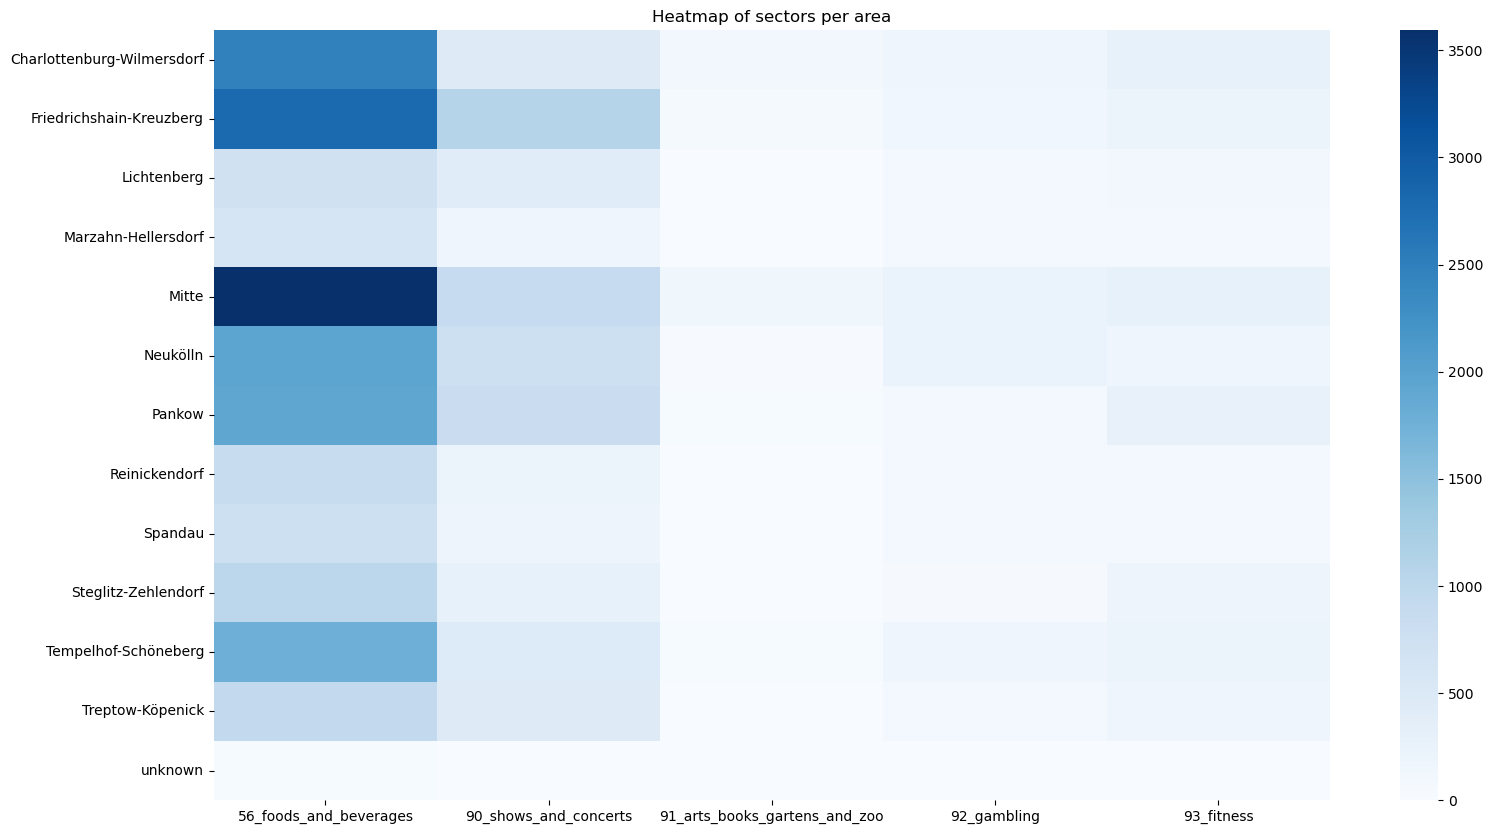

In [124]:
# Set the figure size
# plt.figure(figsize=(18, 10))
fig, ax = plt.subplots(figsize=(18, 10))


# Create a heatmap
sns.heatmap(pivot_table, annot=False, cmap='Blues', ax=ax)

# Add labels and a title
ax.set_xlabel('', ha='center')   # 'branch_top_level_id' column
ax.set_ylabel('', va = 'center')  # 'Prognoseraum'  column

plt.title('Heatmap of sectors per area')

# Show the plot
plt.show()

In [122]:
# Set the figure size
# plt.figure(figsize=(18, 10))
fig, ax = plt.subplots(figsize=(18, 10))


# Create a heatmap
sns.heatmap(pivot_table, annot=False, cmap='Blues', ax=ax)

# Add labels and a title
ax.set_xlabel('', ha='center')   # 'branch_top_level_id' column
ax.set_ylabel('', va = 'center')  # 'Prognoseraum'  column

plt.title('Heatmap of sectors per area')

# Save the graph as images
image_heatmap = f'heatmap_graph_sectors_per_area.png'  # Use 'name' to save each group separately
plt.savefig(os.path.join('graphs', image_heatmap))
plt.close()

# Show the plot
plt.show()

In [106]:


# for bezirk in pivot_table.index:
#     data = pivot_table.loc[bezirk]
#     plt.figure(figsize=(10, 6))  # Create a new figure for each group
#     pivot_table.plot(kind='bar', title=f'Bar Graph for {bezirk}')  # Customize the x and y-axis columns
#     plt.xlabel('Branch Top Level ID')
#     plt.ylabel('Count')
#     plt.xticks(rotation=90)
#     plt.show()


In [107]:
# # Group by 'Bezirk' and iterate through groups
# for name, group in pivot_table.groupby('Bezirk'):
#     plt.figure(figsize=(10, 6))
#     group.plot(kind='bar', ax=plt.gca(), stacked=True, colormap='tab20')

#     plt.title(f'Bar Graph for {name}')
#     plt.xlabel('Branch Top Level ID')
#     plt.ylabel('Count')

#     plt.show()

In [109]:
# Group by 'Bezirk' and iterate through groups
for name, group in pivot_table.groupby('Bezirk'):
    plt.figure(figsize=(10, 6))
    ax=group.plot(kind='bar', ax=plt.gca(), colormap='tab20')

    legend = ax.legend()
    legend.set_title('Business category')  # Set your desired title here

    plt.title(f'Number of businesses for {name}')
    plt.xlabel('')
    plt.ylabel('')
    ax.set_xticklabels([])

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

    # Save the graph as images
    image_bargraphs = f'bar_graph_{name}.png'  # Use 'name' to save each group separately
    plt.savefig(os.path.join('graphs', image_bargraphs))
    plt.close()

    plt.show()

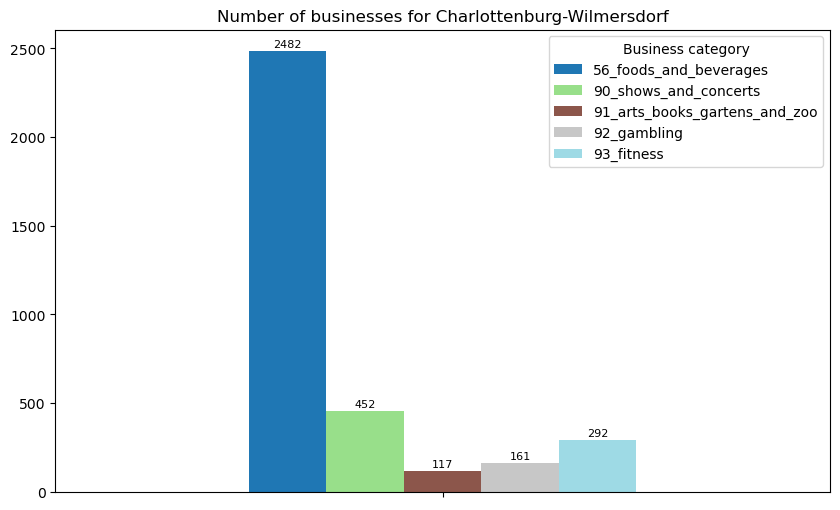

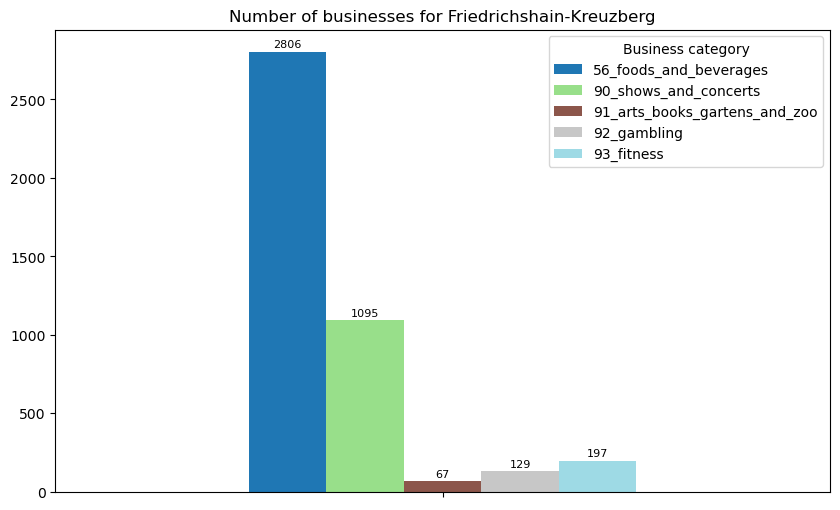

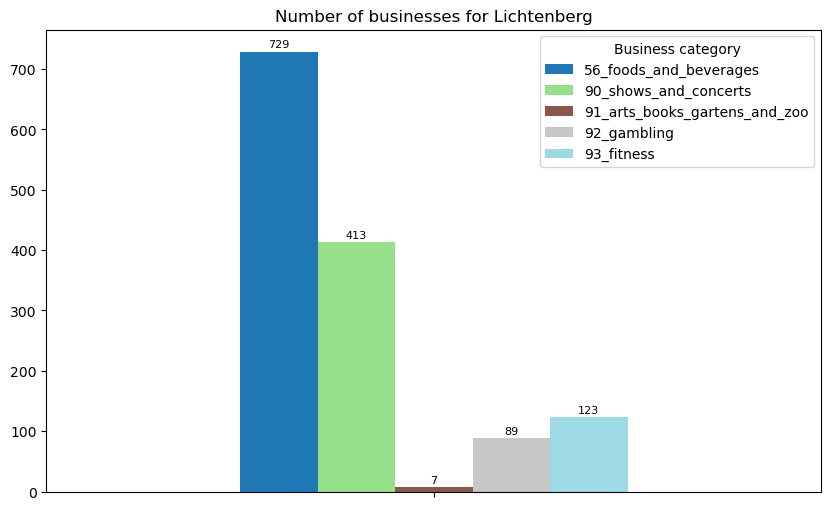

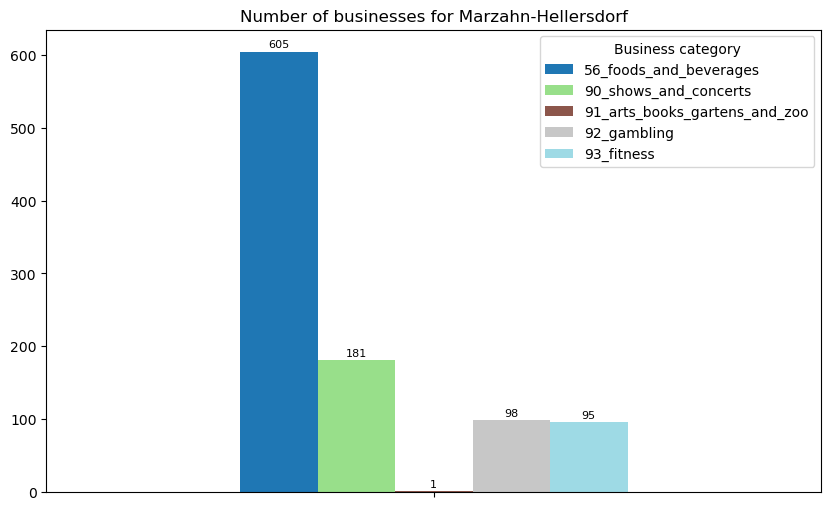

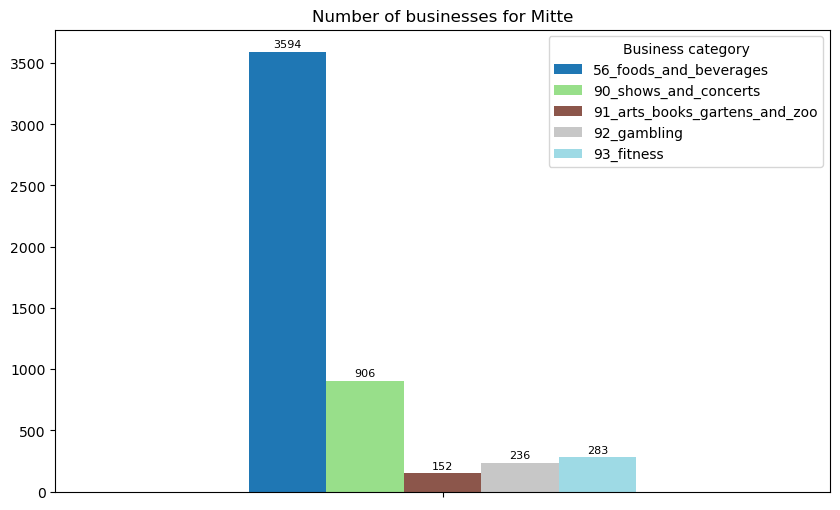

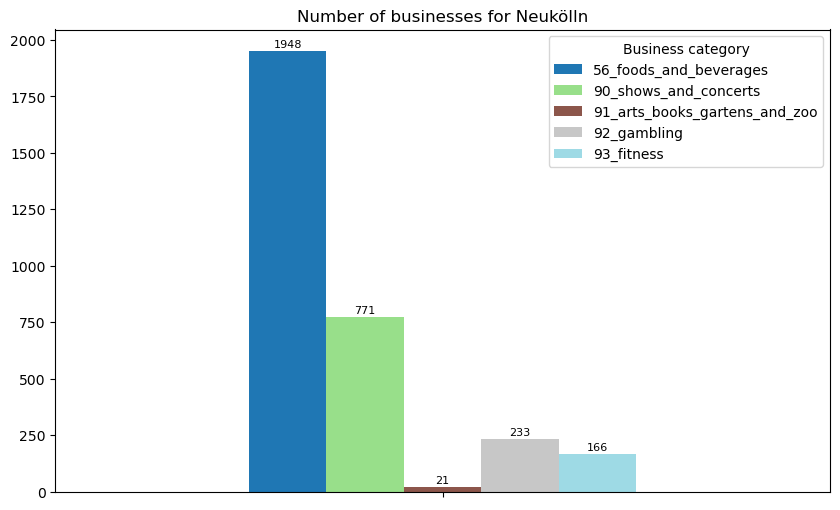

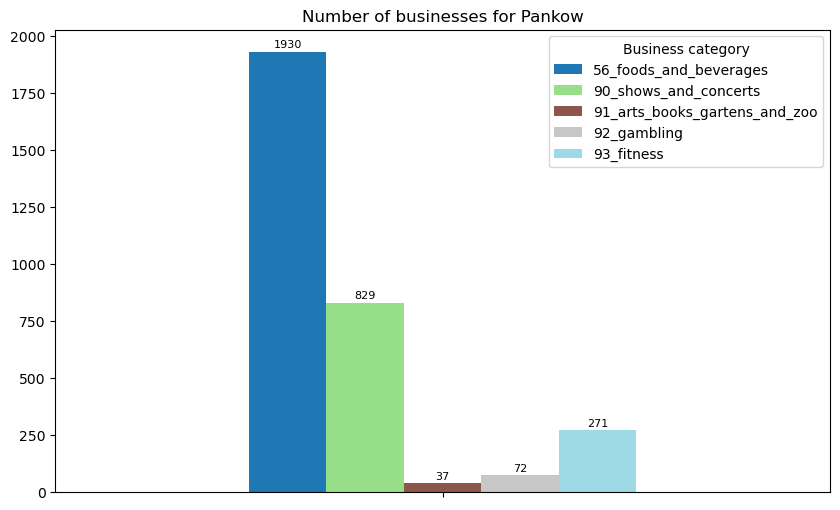

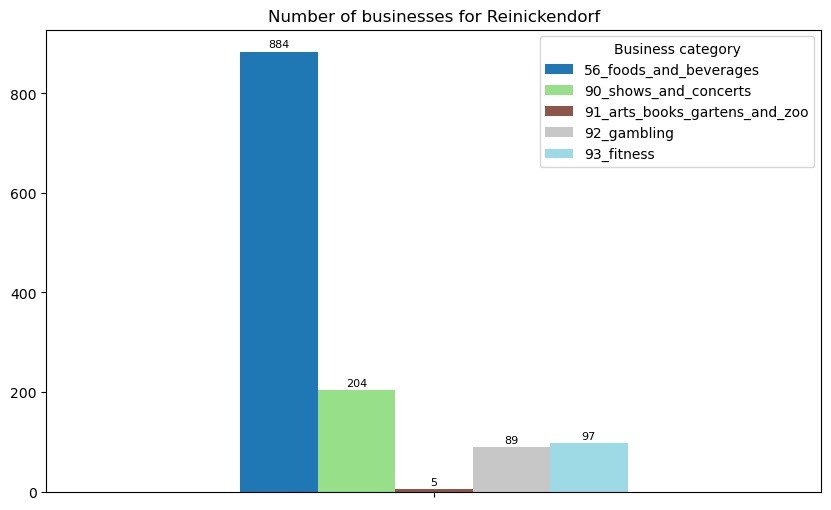

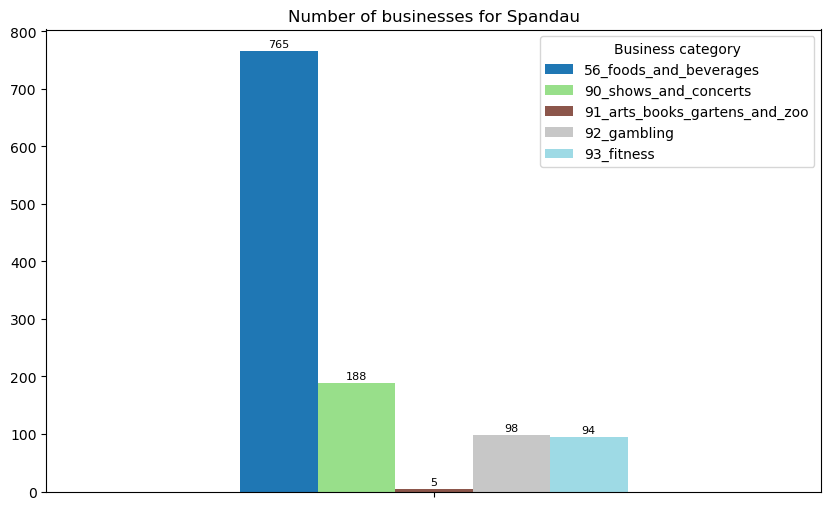

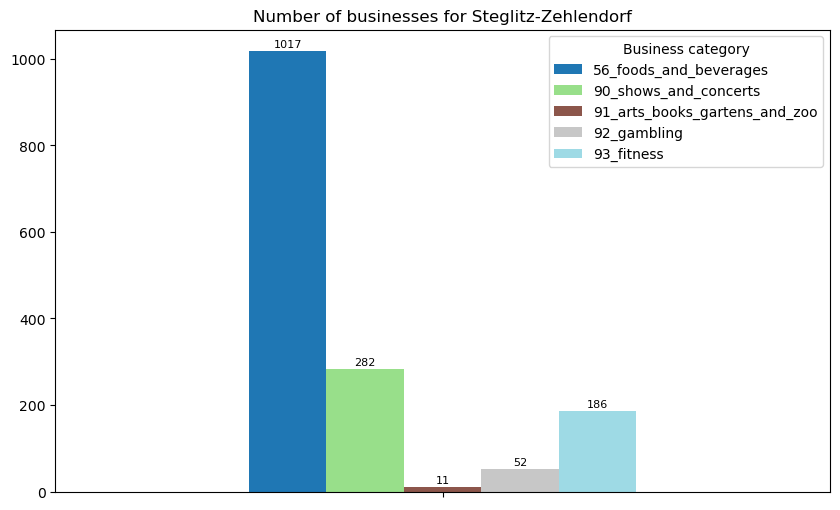

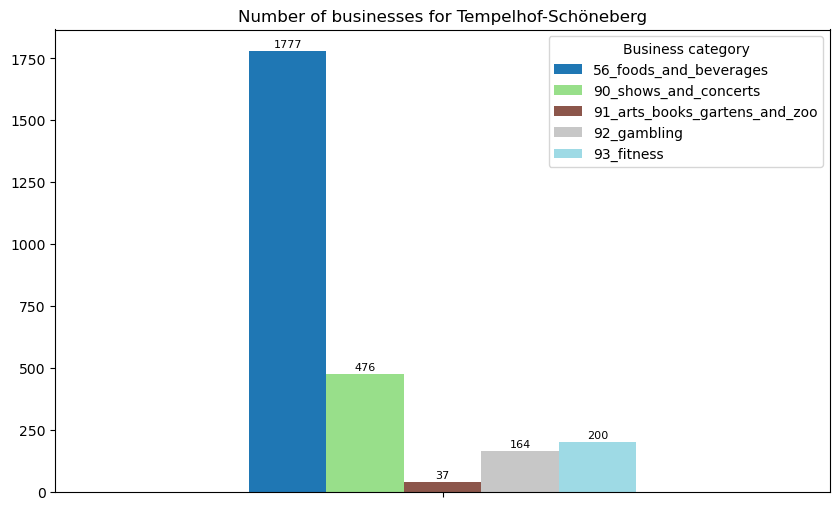

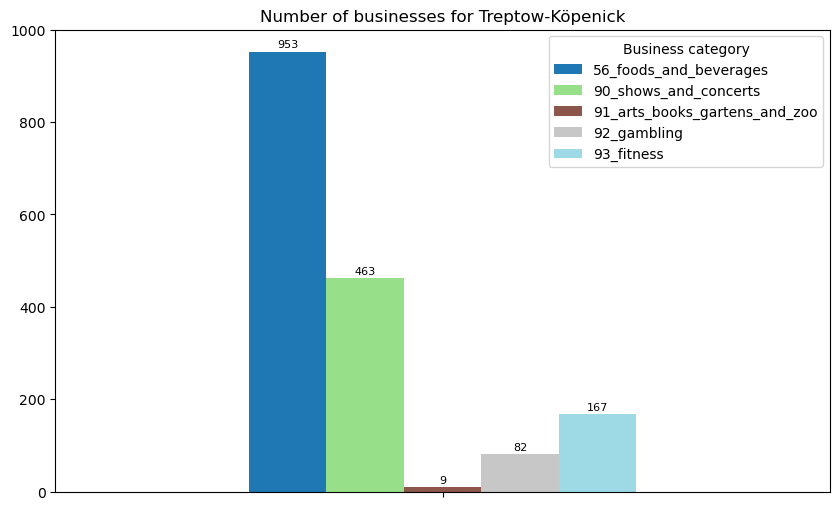

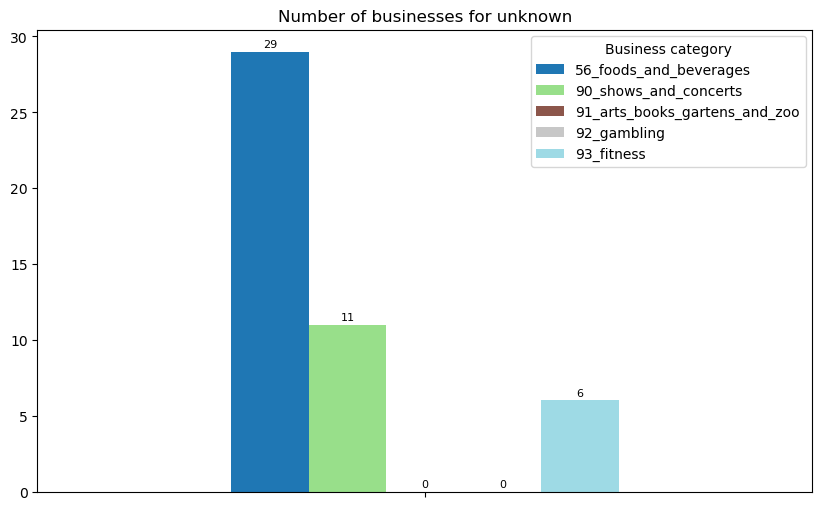

In [123]:
for name, group in pivot_table.groupby('Bezirk'):
    plt.figure(figsize=(10, 6))
    ax=group.plot(kind='bar', ax=plt.gca(), colormap='tab20')

    legend = ax.legend()
    legend.set_title('Business category')  # Set your desired title here

    plt.title(f'Number of businesses for {name}')
    plt.xlabel('')
    plt.ylabel('')
    ax.set_xticklabels([])

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

    plt.show()
